# Course 2 Cyclistic Data Analysis

**==========================================================================================================**

## Project Description

As you learned during your previous meeting with Cyclistic, the product development team has begun planning for the next year of Cyclistic’s bike-sharing program. Cyclistic's Customer Growth Team is creating a business plan for next year. The team wants to understand how their customers are using their bikes; their top priority is identifying customer demand at different station locations. The Cyclistic team posed an important primary question:

**How can we apply customer usage insights to inform new station growth?**

## Data Dictionary

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|
| |	|

## Data sources used

NYC Citi Bike Trips, Census Bureau US Boundaries, GSOD from the National Oceanic and Atmospheric Administration


## Business Task

The product development team at Cyclistic has begun developing their business plan for next year. In order to build a better Cyclistic, the team needs to understand how customers are currently using the bikes, how location and other factors impact demand, and what stations get the most traffic. The Cyclistic team has a few goals:

- Understand current customers needs, what makes a successful product, and how new stations might alleviate demand in different geographical areas

- Understand current usage of bikes at different locations 

- Apply customer usage insights to inform new station growth

- Understand how different users (subscribers and non-subscribers) use the bikes

**==========================================================================================================**

## Import Libraries

In [1]:
import numpy as np
from numpy import count_nonzero, median, mean
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
#import squarify

# Plotly
# import plotly.express as px
# import plotly.offline as py
# import plotly.graph_objs as go

#import pandas_profiling
#from pandas_profiling import ProfileReport
#import sweetviz

#import statsmodels.api as sm
#import statsmodels.formula.api as smf
# from statsmodels.formula.api import ols
# Import variance_inflation_factor from statsmodels
#from statsmodels.stats.outliers_influence import variance_inflation_factor
# Import Tukey's HSD function
#from statsmodels.stats.multicomp import pairwise_tukeyhsd

import datetime
from datetime import datetime, timedelta, date


#import os
#import zipfile
import scipy
from scipy import stats
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from collections import Counter

# Use Folium library to plot values on a map.
#import folium

%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)
#sns.set(rc={'figure.figsize':(14,10)})

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

random.seed(0)
np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


## Import Data

In [2]:
df = pd.read_csv("cyclistic.csv", parse_dates=['start_day','stop_day'])

## Data Quick Glance

In [3]:
df.head()

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
0,Subscriber,10010,Manhattan,Gramercy Park and Murray Hill,10024,Manhattan,Upper West Side,2020-09-28,2020-09-28,70.10,2.30,0.00,30.00,4
1,Subscriber,10075,Manhattan,Upper East Side,10024,Manhattan,Upper West Side,2020-11-16,2020-11-16,58.10,2.90,0.00,10.00,2
2,Subscriber,10023,Manhattan,Upper West Side,10024,Manhattan,Upper West Side,2020-09-22,2020-09-22,66.80,6.40,0.00,10.00,43
3,Customer,10019,Manhattan,Chelsea and Clinton,10028,Manhattan,Upper East Side,2020-11-13,2020-11-13,55.40,9.40,0.01,40.00,2
4,Subscriber,10003,Manhattan,Lower East Side,10028,Manhattan,Upper East Side,2020-10-20,2020-10-20,56.20,5.70,0.00,30.00,13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59788 entries, 0 to 59787
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   usertype                 59788 non-null  object        
 1   zip_code_start           59788 non-null  int64         
 2   borough_start            59788 non-null  object        
 3   neighborhood_start       59788 non-null  object        
 4   zip_code_end             59788 non-null  int64         
 5   borough_end              59788 non-null  object        
 6   neighborhood_end         59788 non-null  object        
 7   start_day                59788 non-null  datetime64[ns]
 8   stop_day                 59788 non-null  datetime64[ns]
 9   day_mean_temperature     59788 non-null  float64       
 10  day_mean_wind_speed      59788 non-null  float64       
 11  day_total_precipitation  59788 non-null  float64       
 12  trip_minutes             59788 n

In [5]:
df.dtypes.value_counts()

object            5
float64           4
int64             3
datetime64[ns]    2
dtype: int64

In [6]:
# Descriptive Statistical Analysis
df.describe(include="all")

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
count,59788,59788.00,59788,59788,59788.00,59788,59788,59788,59788,59788.00,59788.00,59788.00,59788.00,59788.00
unique,2,NaN,3,14,NaN,3,10,730,735,NaN,NaN,NaN,NaN,NaN
top,Subscriber,NaN,Manhattan,Chelsea and Clinton,NaN,Manhattan,Lower East Side,2020-10-11 00:00:00,2020-10-11 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,42437,NaN,52070,14117,NaN,55321,32693,271,267,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-01-01 00:00:00,2019-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31 00:00:00,2021-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,10187.65,NaN,NaN,10095.53,NaN,NaN,NaN,NaN,60.32,14.89,0.12,48.00,10.67
std,NaN,396.45,NaN,NaN,310.27,NaN,NaN,NaN,NaN,15.29,102.48,0.34,595.44,30.53
min,NaN,10001.00,NaN,NaN,10001.00,NaN,NaN,NaN,NaN,9.80,0.70,0.00,0.00,1.00
25%,NaN,10009.00,NaN,NaN,10001.00,NaN,NaN,NaN,NaN,50.60,2.90,0.00,10.00,1.00


In [7]:
# Descriptive Statistical Analysis
df.describe(include=["int", "float"])

,zip_code_start,zip_code_end,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
count,59788.00,59788.00,59788.00,59788.00,59788.00,59788.00,59788.00
mean,10187.65,10095.53,60.32,14.89,0.12,48.00,10.67
std,396.45,310.27,15.29,102.48,0.34,595.44,30.53
min,10001.00,10001.00,9.80,0.70,0.00,0.00,1.00
25%,10009.00,10001.00,50.60,2.90,0.00,10.00,1.00
50%,10016.00,10002.00,62.80,4.00,0.00,20.00,2.00
75%,10038.00,10003.00,73.50,5.30,0.04,30.00,7.00
max,11238.00,11233.00,88.00,999.90,4.53,97740.00,455.00


In [8]:
# Descriptive Statistical Analysis
df.describe(include="object")

,usertype,borough_start,neighborhood_start,borough_end,neighborhood_end
count,59788,59788,59788,59788,59788
unique,2,3,14,3,10
top,Subscriber,Manhattan,Chelsea and Clinton,Manhattan,Lower East Side
freq,42437,52070,14117,55321,32693


In [9]:
df.columns

Index(['usertype', 'zip_code_start', 'borough_start', 'neighborhood_start', 'zip_code_end', 'borough_end', 'neighborhood_end', 'start_day', 'stop_day', 'day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count'], dtype='object')

In [10]:
df.shape

(59788, 14)

In [11]:
df.duplicated().sum()

0

**==========================================================================================================**

# Exploratory Data Analysis

Exploratory Data Analysis (EDA) is the crucial process of using summary statistics and graphical representations to perform preliminary investigations on data to uncover patterns, detect anomalies, test hypotheses, and verify assumptions.

## Sample a smaller dataset

In [12]:
df = df.sample(frac=0.1)

In [13]:
df

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
26354,Subscriber,11238,Brooklyn,Central Brooklyn,10001,Manhattan,Chelsea and Clinton,2020-12-03,2020-12-03,50.90,6.20,0.10,40.00,2
47217,Customer,10017,Manhattan,Gramercy Park and Murray Hill,10003,Manhattan,Lower East Side,2020-06-30,2020-07-01,74.50,3.70,0.00,1380.00,1
18296,Customer,10022,Manhattan,Gramercy Park and Murray Hill,10001,Manhattan,Chelsea and Clinton,2020-05-29,2020-05-29,73.60,4.50,0.00,20.00,1
16706,Subscriber,10019,Manhattan,Chelsea and Clinton,10001,Manhattan,Chelsea and Clinton,2019-05-20,2019-05-20,66.20,2.90,0.00,10.00,124
57593,Customer,10002,Manhattan,Lower East Side,10003,Manhattan,Lower East Side,2020-05-03,2020-05-03,61.60,2.50,0.00,30.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26437,Subscriber,10013,Manhattan,Greenwich Village and Soho,10001,Manhattan,Chelsea and Clinton,2020-04-26,2020-04-26,54.10,4.80,0.00,20.00,6
50791,Subscriber,10007,Manhattan,Lower Manhattan,10003,Manhattan,Lower East Side,2019-06-13,2019-06-13,69.50,3.40,0.21,10.00,6
25410,Customer,10018,Manhattan,Chelsea and Clinton,10001,Manhattan,Chelsea and Clinton,2020-12-28,2020-12-28,43.60,7.10,0.02,0.00,1
53328,Subscriber,10012,Manhattan,Greenwich Village and Soho,10003,Manhattan,Lower East Side,2019-07-07,2019-07-07,79.80,4.80,0.00,20.00,10


In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
0,Subscriber,11238,Brooklyn,Central Brooklyn,10001,Manhattan,Chelsea and Clinton,2020-12-03,2020-12-03,50.90,6.20,0.10,40.00,2
1,Customer,10017,Manhattan,Gramercy Park and Murray Hill,10003,Manhattan,Lower East Side,2020-06-30,2020-07-01,74.50,3.70,0.00,1380.00,1
2,Customer,10022,Manhattan,Gramercy Park and Murray Hill,10001,Manhattan,Chelsea and Clinton,2020-05-29,2020-05-29,73.60,4.50,0.00,20.00,1
3,Subscriber,10019,Manhattan,Chelsea and Clinton,10001,Manhattan,Chelsea and Clinton,2019-05-20,2019-05-20,66.20,2.90,0.00,10.00,124
4,Customer,10002,Manhattan,Lower East Side,10003,Manhattan,Lower East Side,2020-05-03,2020-05-03,61.60,2.50,0.00,30.00,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5974,Subscriber,10013,Manhattan,Greenwich Village and Soho,10001,Manhattan,Chelsea and Clinton,2020-04-26,2020-04-26,54.10,4.80,0.00,20.00,6
5975,Subscriber,10007,Manhattan,Lower Manhattan,10003,Manhattan,Lower East Side,2019-06-13,2019-06-13,69.50,3.40,0.21,10.00,6
5976,Customer,10018,Manhattan,Chelsea and Clinton,10001,Manhattan,Chelsea and Clinton,2020-12-28,2020-12-28,43.60,7.10,0.02,0.00,1
5977,Subscriber,10012,Manhattan,Greenwich Village and Soho,10003,Manhattan,Lower East Side,2019-07-07,2019-07-07,79.80,4.80,0.00,20.00,10


In [16]:
df.shape

(5979, 14)

In [17]:
df.sort_values(by = "trip_count", ascending=False).head()

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
2049,Subscriber,10011,Manhattan,Chelsea and Clinton,10003,Manhattan,Lower East Side,2020-08-04,2020-08-04,80.70,4.60,0.43,10.00,396
3019,Subscriber,10011,Manhattan,Chelsea and Clinton,10003,Manhattan,Lower East Side,2020-08-14,2020-08-14,77.10,2.20,0.00,10.00,387
5657,Subscriber,10011,Manhattan,Chelsea and Clinton,10003,Manhattan,Lower East Side,2020-05-26,2020-05-26,76.10,4.50,0.00,10.00,364
2845,Subscriber,10003,Manhattan,Lower East Side,10003,Manhattan,Lower East Side,2020-10-08,2020-10-08,63.80,2.90,0.00,10.00,362
5763,Subscriber,10011,Manhattan,Chelsea and Clinton,10003,Manhattan,Lower East Side,2019-05-19,2019-05-19,60.30,4.30,0.00,10.00,361


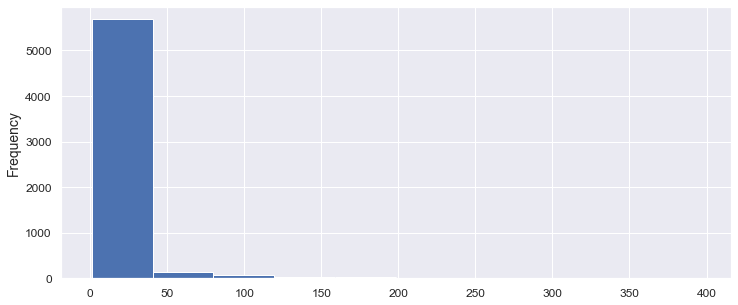

In [18]:
df.trip_count.plot(kind = "hist", figsize = (12,5), fontsize = 12, bins=10)
plt.show()

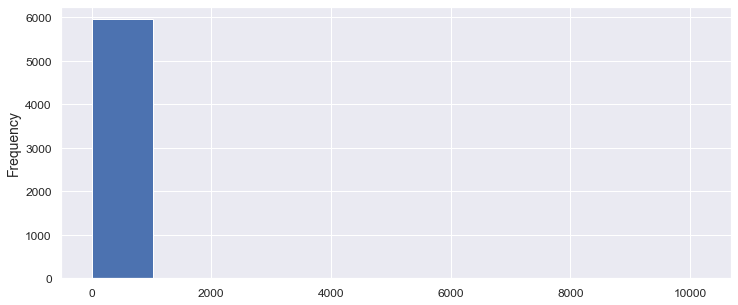

In [19]:
df.trip_minutes.plot(kind = "hist", figsize = (12,5), fontsize = 12)
plt.show()

In [20]:
df.zip_code_start.value_counts().sort_values(ascending=False).head(10)

10003    326
10002    297
10011    295
10016    264
10001    263
10012    260
10019    243
10009    240
10014    212
10010    207
Name: zip_code_start, dtype: int64

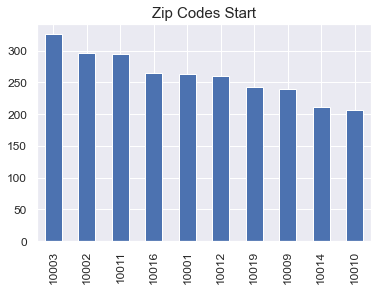

In [21]:
df.zip_code_start.value_counts().nlargest(10).plot(kind="bar")
plt.title("Zip Codes Start", size=15)
plt.show()

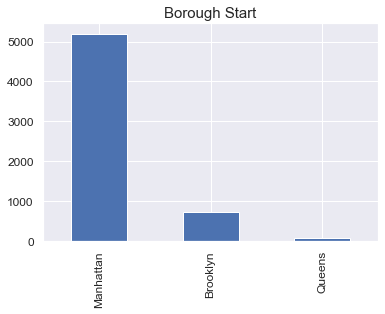

In [22]:
df.borough_start.value_counts().nlargest(10).plot(kind="bar")
plt.title("Borough Start", size=15)
plt.show()

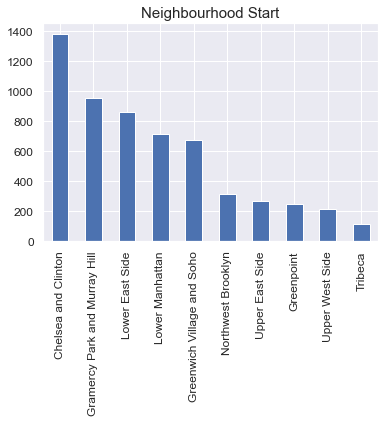

In [23]:
df.neighborhood_start.value_counts().nlargest(10).plot(kind="bar")
plt.title("Neighbourhood Start", size=15)
plt.show()

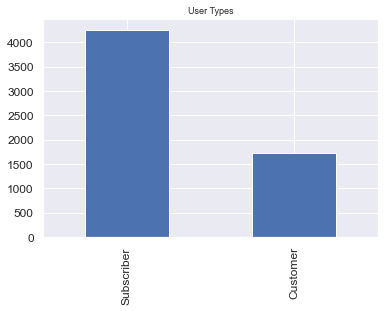

In [24]:
df.usertype.value_counts().nlargest(10).plot(kind="bar")
plt.title("User Types")
plt.show()

**==========================================================================================================**

## Groupby

Most commonly, we use `groupby()` to split the data into groups,this will apply some function to each of the groups (e.g. mean, median, min, max, count), then combine the results into a data structure. For example, let's select the 'VALUE' column and calculate the mean of the gasoline prices per year. First, we specify the 'Year" column, following by the 'VALUE' column, and the `mean()` function.

In [25]:
usertype = df.groupby(["usertype"], as_index=True)['trip_minutes', 'trip_count'].mean()
pd.DataFrame(usertype)

,trip_minutes,trip_count
usertype,,
Customer,40.68,3.38
Subscriber,44.82,13.01


In [26]:
zip_code_start = df.groupby(['zip_code_start'], as_index=True)['trip_minutes', 'trip_count'].mean()
zip_code_start.head(10)

,trip_minutes,trip_count
zip_code_start,,
10001,36.43,11.65
10002,80.51,19.51
10003,75.95,28.82
10004,51.58,4.23
10005,26.35,4.48
10007,80.56,5.89
10009,43.79,14.54
10010,34.54,11.00
10011,41.42,19.41


In [27]:
borough_start = df.groupby(['borough_start'], as_index=True)['trip_minutes', 'trip_count'].mean()
borough_start

,trip_minutes,trip_count
borough_start,,
Brooklyn,47.92,4.58
Manhattan,43.16,11.08
Queens,32.79,5.23


In [28]:
neighborhood_start = df.groupby(["neighborhood_start"])['trip_minutes', 'trip_count'].mean()
neighborhood_start

,trip_minutes,trip_count
neighborhood_start,,
Bushwick and Williamsburg,19.80,3.02
Central Brooklyn,28.56,1.95
Chelsea and Clinton,36.84,10.84
Gramercy Park and Murray Hill,34.21,10.46
Greenpoint,32.94,7.82
Greenwich Village and Soho,43.00,11.80
Lower East Side,68.57,21.64
Lower Manhattan,47.20,4.93
Northwest Brooklyn,71.31,3.21


In [29]:
df_startday = df.groupby("start_day", as_index=False)['day_mean_temperature', 
                                                'day_mean_wind_speed', 'day_total_precipitation'].mean()
df_startday

,start_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation
0,2019-01-01,28.20,5.10,0.00
1,2019-01-02,28.50,9.80,0.02
2,2019-01-03,15.60,10.10,0.58
3,2019-01-04,15.80,4.00,0.02
4,2019-01-06,45.60,6.30,0.23
...,...,...,...,...
718,2020-12-27,52.00,4.50,0.12
719,2020-12-28,43.60,7.10,0.02
720,2020-12-29,39.30,6.80,0.33
721,2020-12-30,41.30,3.00,0.15


In [30]:
df_startday = df.groupby("stop_day", as_index=False)['day_mean_temperature', 
                                                'day_mean_wind_speed', 'day_total_precipitation'].mean()
df_startday

,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation
0,2019-01-01,28.20,5.10,0.00
1,2019-01-02,28.50,9.80,0.02
2,2019-01-03,15.60,10.10,0.58
3,2019-01-04,15.80,4.00,0.02
4,2019-01-06,45.60,6.30,0.23
...,...,...,...,...
719,2020-12-28,43.60,7.10,0.02
720,2020-12-29,39.30,6.80,0.33
721,2020-12-30,41.30,3.00,0.15
722,2020-12-31,46.03,3.00,0.19


In [31]:
df.pivot_table(index=["start_day","stop_day"], values="trip_count", aggfunc='mean')

trip_count
start_day  stop_day              
2019-01-01 2019-01-01        2.25
2019-01-02 2019-01-02        2.50
2019-01-03 2019-01-03        1.00
2019-01-04 2019-01-04       46.00
2019-01-06 2019-01-06       10.60
...                           ...
2020-12-29 2020-12-29        1.60
2020-12-30 2020-12-30        7.07
           2020-12-31        1.00
2020-12-31 2020-12-31        6.10
           2021-01-01        2.00

[896 rows x 1 columns]

**==========================================================================================================**

# Data Visualization

## Matplotlib: Standard Python Visualization Library<a id="10"></a>

The primary plotting library we will explore in the course is Matplotlib.  As mentioned on their website:

> Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of hardcopy formats and interactive environments across platforms. Matplotlib can be used in Python scripts, the Python and IPython shell, the jupyter notebook, web application servers, and four graphical user interface toolkits.

### Matplotlib.Pyplot

One of the core aspects of Matplotlib is `matplotlib.pyplot`. It is Matplotlib's scripting layer which we studied in details in the videos about Matplotlib. Recall that it is a collection of command style functions that make Matplotlib work like MATLAB. Each `pyplot` function makes some change to a figure: e.g., creates a figure, creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc. In this lab, we will work with the scripting layer to learn how to generate line plots. In future labs, we will get to work with the Artist layer as well to experiment first hand how it differs from the scripting layer.



## Seaborn Library

### 1. Numerical Data Ploting
- relplot()
- scatterplot()
- lineplot()

### 2. Categorical Data Ploting
- catplot()
- boxplot()
- stripplot()
- swarmplot()
- etc...

### 3. Visualizing Distribution of the Data
- distplot()
- kdeplot()
- jointplot()
- rugplot()

### 4. Linear Regression and Relationship
- regplot()
- lmplot()

### 5. Controlling Ploted Figure Aesthetics
- figure styling
- axes styling
- color palettes
- etc..

## Subplots

Often times we might want to plot multiple plots within the same figure. For example, we might want to perform a side by side comparison of the box plot with the line plot of China and India's immigration.

To visualize multiple plots together, we can create a **`figure`** (overall canvas) and divide it into **`subplots`**, each containing a plot. With **subplots**, we usually work with the **artist layer** instead of the **scripting layer**.

Typical syntax is : <br>

```python
    fig = plt.figure() # create figure
    ax = fig.add_subplot(nrows, ncols, plot_number) # create subplots
```

Where

*   `nrows` and `ncols` are used to notionally split the figure into (`nrows` \* `ncols`) sub-axes,
*   `plot_number` is used to identify the particular subplot that this function is to create within the notional grid. `plot_number` starts at 1, increments across rows first and has a maximum of `nrows` \* `ncols` as shown below.

In the case when `nrows`, `ncols`, and `plot_number` are all less than 10, a convenience exists such that a 3-digit number can be given instead, where the hundreds represent `nrows`, the tens represent `ncols` and the units represent `plot_number`. For instance,

```python
   subplot(211) == subplot(2, 1, 1) 
```

produces a subaxes in a figure which represents the top plot (i.e. the first) in a 2 rows by 1 column notional grid (no grid actually exists, but conceptually this is how the returned subplot has been positioned).

In [32]:
# Check plot styles
#plt.style.available

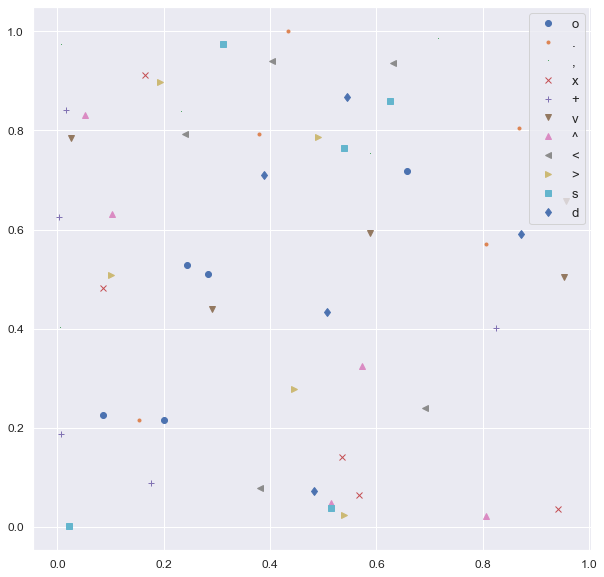

In [33]:
markers = ['o','.',',','x','+','v','^','<','>','s','d']

plt.figure(figsize=(10,10))

for m in markers:
    plt.plot(np.random.rand(5),np.random.rand(5),m,label=m)

plt.legend()
plt.show()

## FacetGrid (Building structured multi-plot grids)

The FacetGrid class is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset. A FacetGrid can be drawn with up to three dimensions: row, col, and hue. The first two have obvious correspondence with the resulting array of axes; think of the hue variable as a third dimension along a depth axis, where different levels are plotted with different colors.

Each of relplot(), displot(), catplot(), and lmplot() use this object internally, and they return the object when they are finished so that it can be used for further tweaking.

### Seaborn Version

In [34]:
df.columns

Index(['usertype', 'zip_code_start', 'borough_start', 'neighborhood_start', 'zip_code_end', 'borough_end', 'neighborhood_end', 'start_day', 'stop_day', 'day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count'], dtype='object')

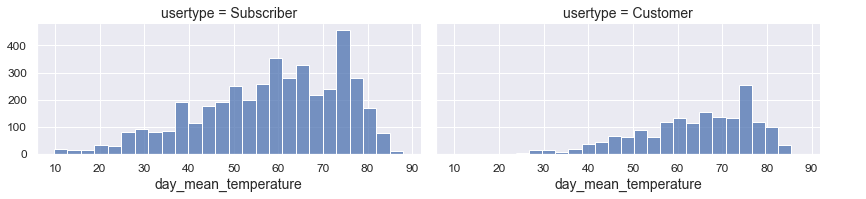

In [35]:
g = sns.FacetGrid(data=df, col="usertype", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.histplot, "day_mean_temperature")
g.add_legend()
plt.show()

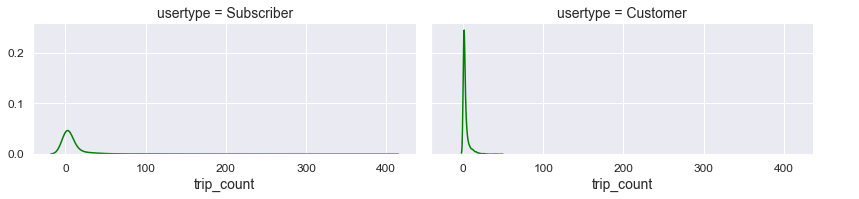

In [36]:
g = sns.FacetGrid(data=df, col="usertype", hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.kdeplot, "trip_count", color="green")
g.add_legend()
plt.show()

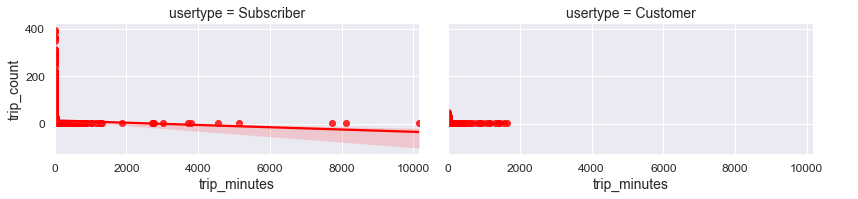

In [37]:
g = sns.FacetGrid(data=df, col="usertype", row=None, hue=None, col_wrap=None, height=3, aspect=2, margin_titles=True)
g.map(sns.regplot, "trip_minutes", "trip_count", color="red", fit_reg=True, x_jitter=None)
g.add_legend()
plt.show()

### Seaborn Version

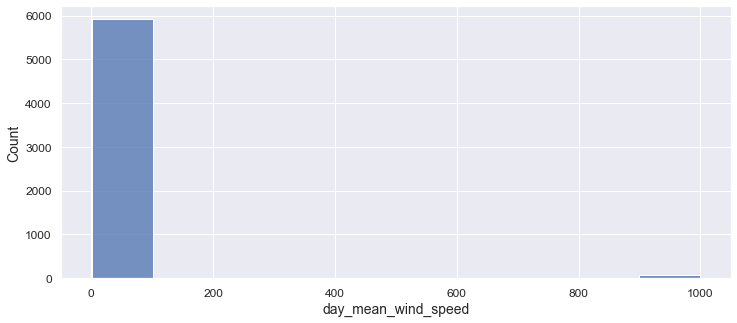

In [38]:
fig, ax = plt.subplots(figsize=(12,5))

sns.histplot(x=df.day_mean_wind_speed, data=df, bins=10)

plt.show()

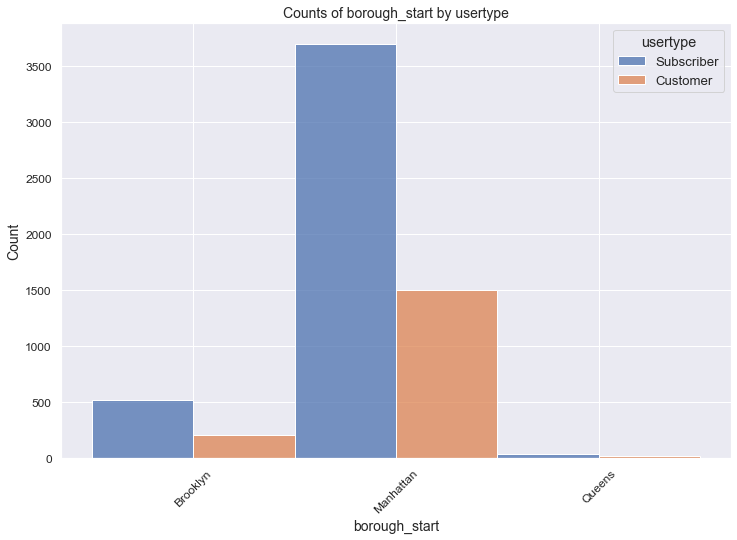

In [39]:
# Create stacked histogram 
plt.figure(figsize=(12,8))
sns.histplot(data=df, x='borough_start', hue='usertype', multiple="dodge")
plt.xticks(rotation='45')
plt.title('Counts of borough_start by usertype', fontsize=14);

## Bar Plots

### Seaborn Version

In [40]:
df.head(1)

,usertype,zip_code_start,borough_start,neighborhood_start,zip_code_end,borough_end,neighborhood_end,start_day,stop_day,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
0,Subscriber,11238,Brooklyn,Central Brooklyn,10001,Manhattan,Chelsea and Clinton,2020-12-03,2020-12-03,50.90,6.20,0.10,40.00,2


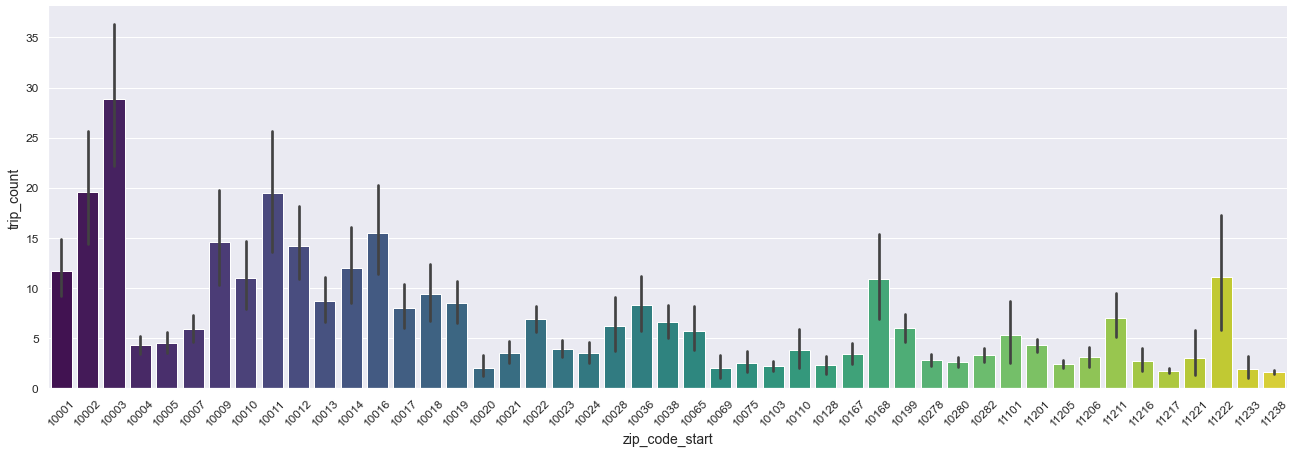

In [41]:
sns.catplot(x="zip_code_start", y="trip_count", kind='bar', data=df, hue=None, aspect=3, height=6, palette="viridis")
plt.xticks(rotation=45)
plt.show()

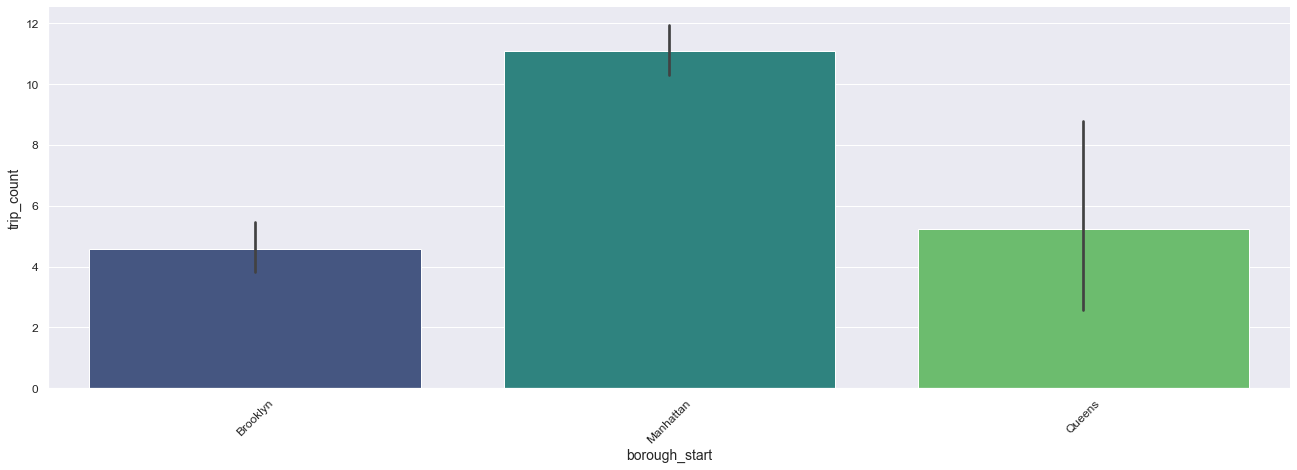

In [42]:
sns.catplot(x="borough_start", y="trip_count", kind='bar', data=df, hue=None, aspect=3, height=6, palette="viridis")
plt.xticks(rotation=45)
plt.show()

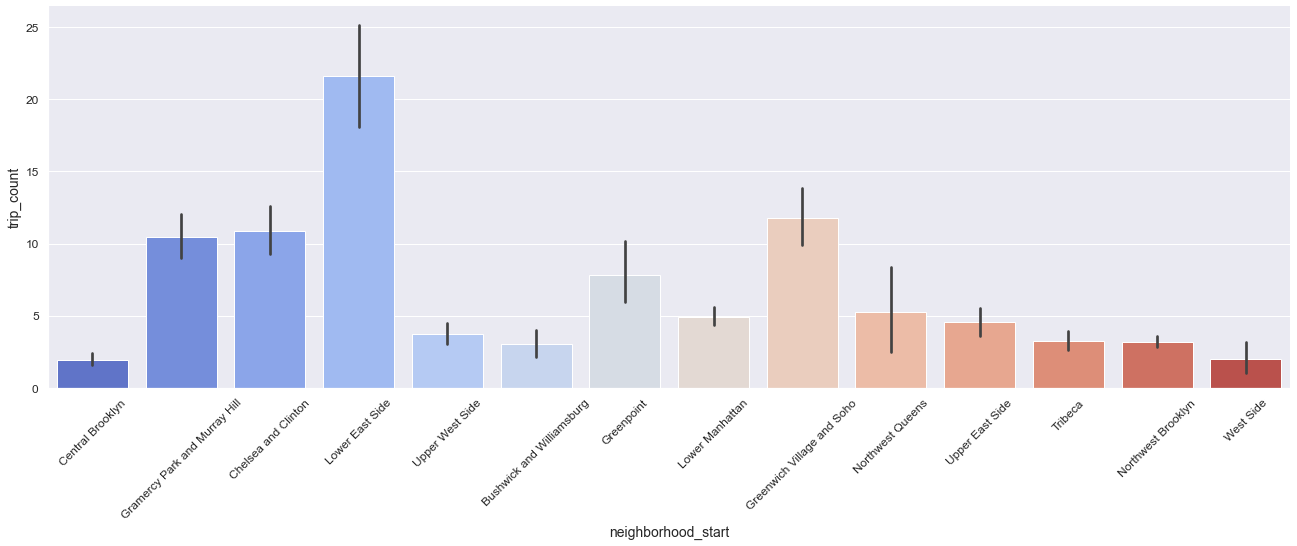

In [43]:
sns.catplot(x="neighborhood_start", y="trip_count", kind='bar', data=df, hue=None, aspect=3, height=6, palette="coolwarm")
plt.xticks(rotation=45)
plt.show()

## Rel Plot

To make complex comparisons easier, Seaborn provides a function called relplot, which is short for relationship plot. relplot takes some of the same arguments as scatterplot, such as data, x, y, and hue, but adds other arguments as well. 


sns.replot has the parameters height and aspect that control the dimensions of each subplot it would generate. You can use those to set your width and height, where width = aspect * height

**Splitting the Figure into Subplots / Facets**

As seen in the figures above, it can become confusing to distinguish the different categories (lithologies) when they are all lying on top of each other. One way around this is to create multiple subplots, one for each category

### Seaborn Version

In [44]:
df.columns

Index(['usertype', 'zip_code_start', 'borough_start', 'neighborhood_start', 'zip_code_end', 'borough_end', 'neighborhood_end', 'start_day', 'stop_day', 'day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count'], dtype='object')

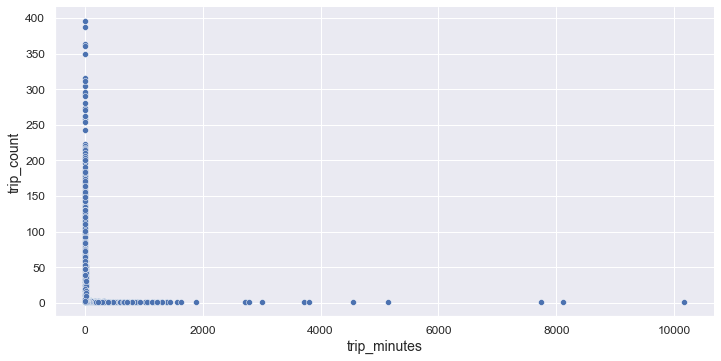

In [45]:
sns.relplot(x=df.trip_minutes, y=df.trip_count, data=df, hue=None, size=None, style=None, col=None, height=5, aspect=2)
plt.show()

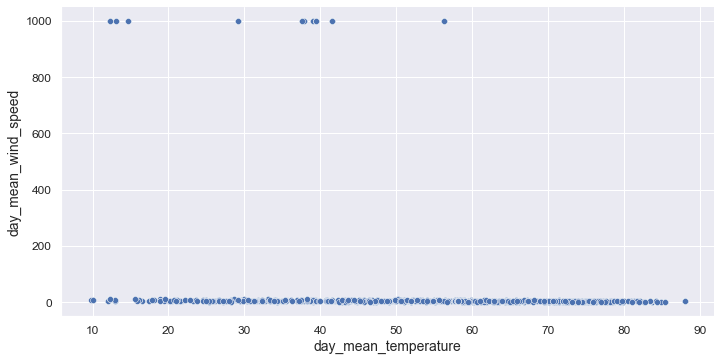

In [46]:
sns.relplot(x=df.day_mean_temperature, y=df.day_mean_wind_speed, data=df, height=5, aspect=2, ci=None, col=None, col_wrap=None)
plt.show()

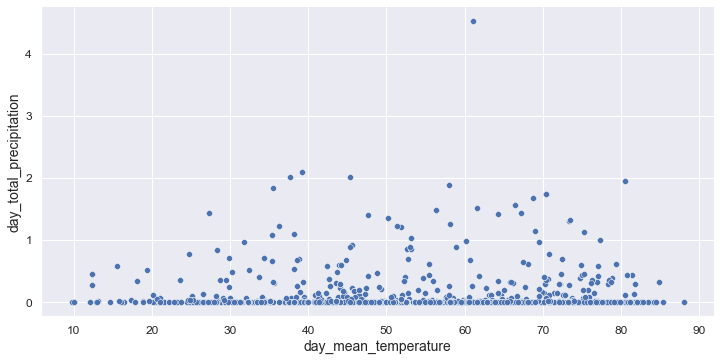

In [47]:
sns.relplot(x=df.day_mean_temperature, y=df.day_total_precipitation, data=df, height=5, aspect=2, ci=None, col=None, col_wrap=None)
plt.show()

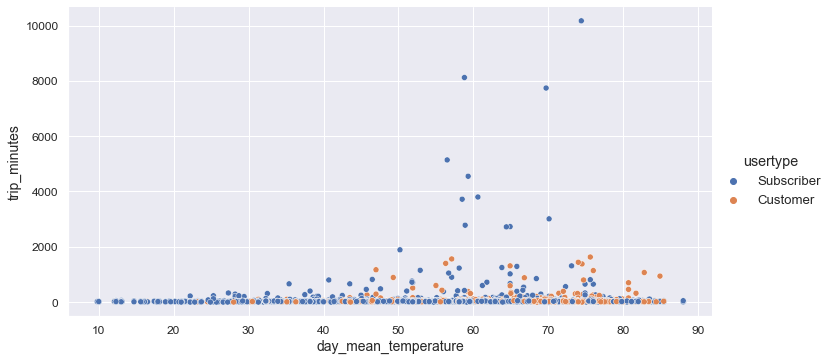

In [48]:
sns.relplot(x=df.day_mean_temperature, y=df.trip_minutes, data=df, height=5, aspect=2, 
            ci=None, col=None, col_wrap=None, hue=df.usertype)
plt.show()

## Line Plots

**What is a line plot and why use it?**

A line chart or line plot is a type of plot which displays information as a series of data points called 'markers' connected by straight line segments. It is a basic type of chart common in many fields.
Use line plot when you have a continuous data set. These are best suited for trend-based visualizations of data over a period of time.

Line plot is a handy tool to display several dependent variables against one independent variable. However, it is recommended that no more than 5-10 lines on a single graph; any more than that and it becomes difficult to interpret.

In [49]:
df.columns

Index(['usertype', 'zip_code_start', 'borough_start', 'neighborhood_start', 'zip_code_end', 'borough_end', 'neighborhood_end', 'start_day', 'stop_day', 'day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count'], dtype='object')

### Seaborn Version

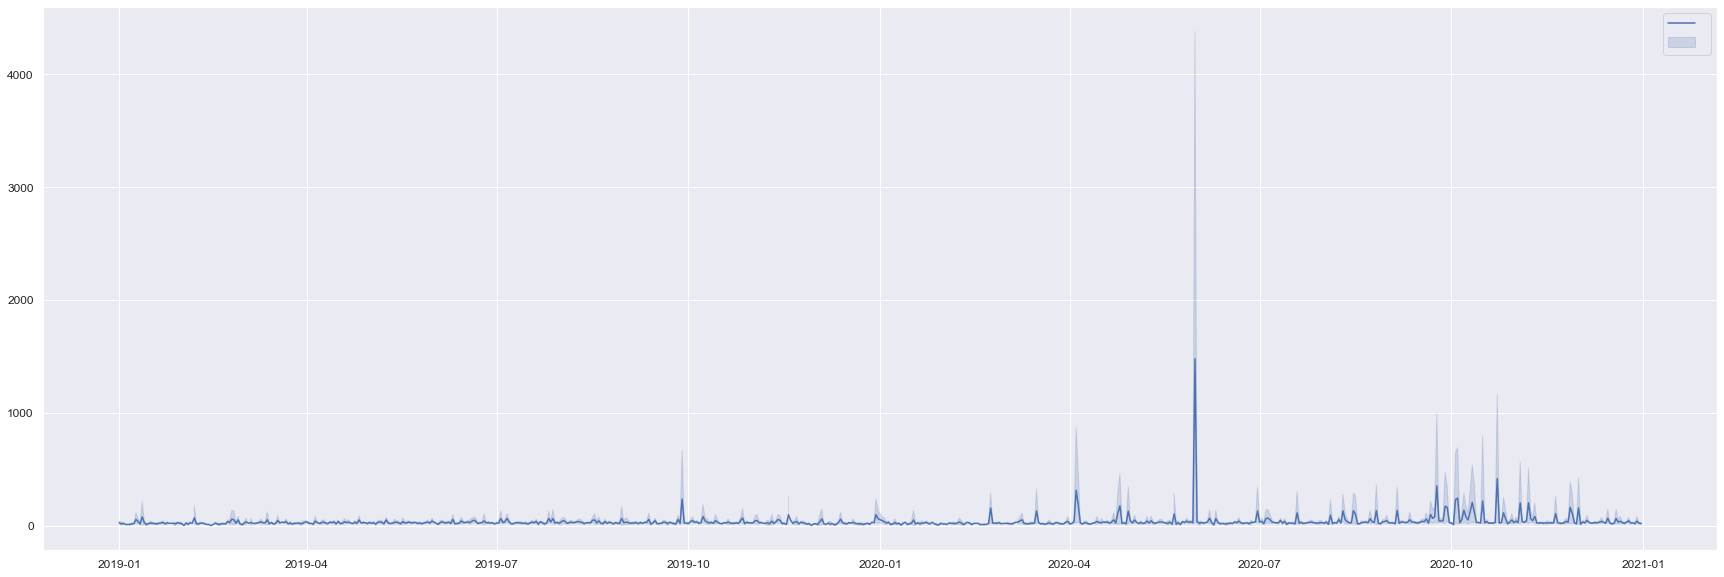

In [50]:
fig = plt.figure(figsize=(30,10))
sns.lineplot(x=df.start_day, y=df.trip_minutes, data=df, estimator='mean')
plt.title("", fontsize=20)
plt.xlabel("", fontsize=20)
plt.ylabel("", fontsize=20)
plt.legend(['',''])
plt.show()

## Box Plots

A `box plot` is a way of statistically representing the *distribution* of the data through five main dimensions:

*   **Minimum:** The smallest number in the dataset excluding the outliers.
*   **First quartile:** Middle number between the `minimum` and the `median`.
*   **Second quartile (Median):** Middle number of the (sorted) dataset.
*   **Third quartile:** Middle number between `median` and `maximum`.
*   **Maximum:** The largest number in the dataset excluding the outliers.

### Seaborn Version

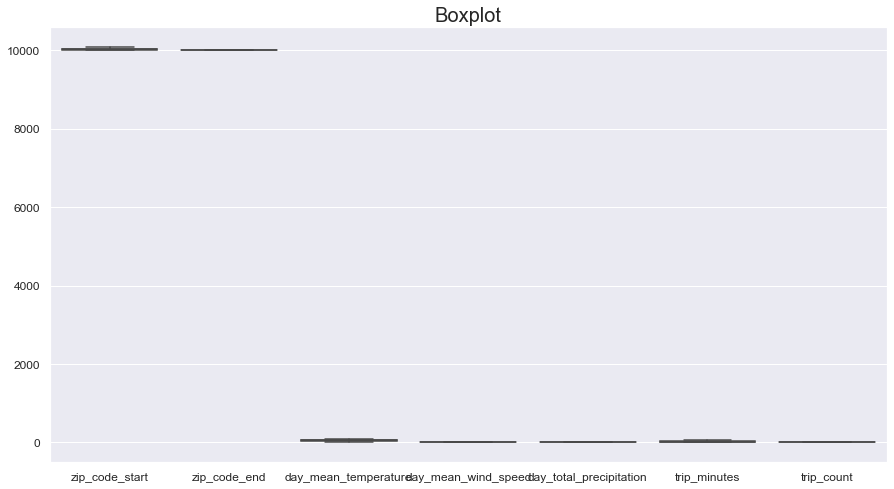

In [51]:
# Create boxplot to visualize the outliers
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(15,8))
sns.boxplot(data=df.select_dtypes(np.number), showfliers=False);
ax.set_title("Boxplot", fontsize=20)
plt.show()

In [52]:
df.columns

Index(['usertype', 'zip_code_start', 'borough_start', 'neighborhood_start', 'zip_code_end', 'borough_end', 'neighborhood_end', 'start_day', 'stop_day', 'day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count'], dtype='object')

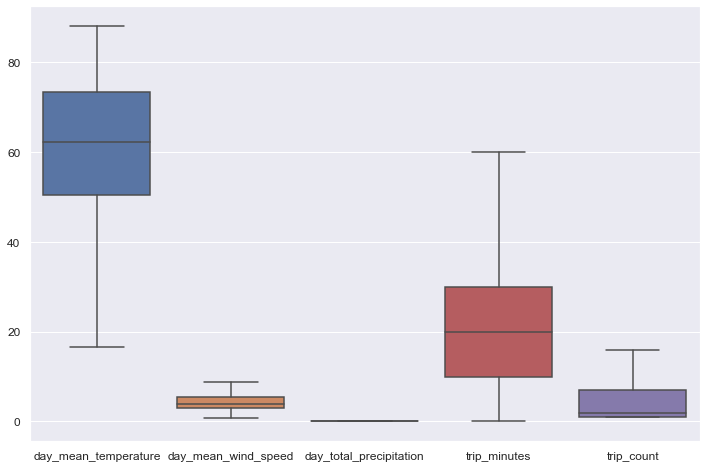

In [53]:
# Create boxplot to visualize distribution of data without outliers
### YOUR CODE HERE ###

fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data=df[['day_mean_temperature', 'day_mean_wind_speed', 'day_total_precipitation', 'trip_minutes', 'trip_count']], showfliers=False);
ax.set_title("", fontsize=20)

plt.show()

### Seaborn Version

In [54]:
df.corr()

,zip_code_start,zip_code_end,day_mean_temperature,day_mean_wind_speed,day_total_precipitation,trip_minutes,trip_count
zip_code_start,1.00,0.42,0.03,-0.00,-0.00,0.00,-0.09
zip_code_end,0.42,1.00,0.06,-0.01,-0.01,0.05,-0.06
day_mean_temperature,0.03,0.06,1.00,-0.15,-0.01,0.02,0.05
day_mean_wind_speed,-0.00,-0.01,-0.15,1.00,-0.02,-0.00,-0.01
day_total_precipitation,-0.00,-0.01,-0.01,-0.02,1.00,-0.01,-0.01
trip_minutes,0.00,0.05,0.02,-0.00,-0.01,1.00,-0.04
trip_count,-0.09,-0.06,0.05,-0.01,-0.01,-0.04,1.00


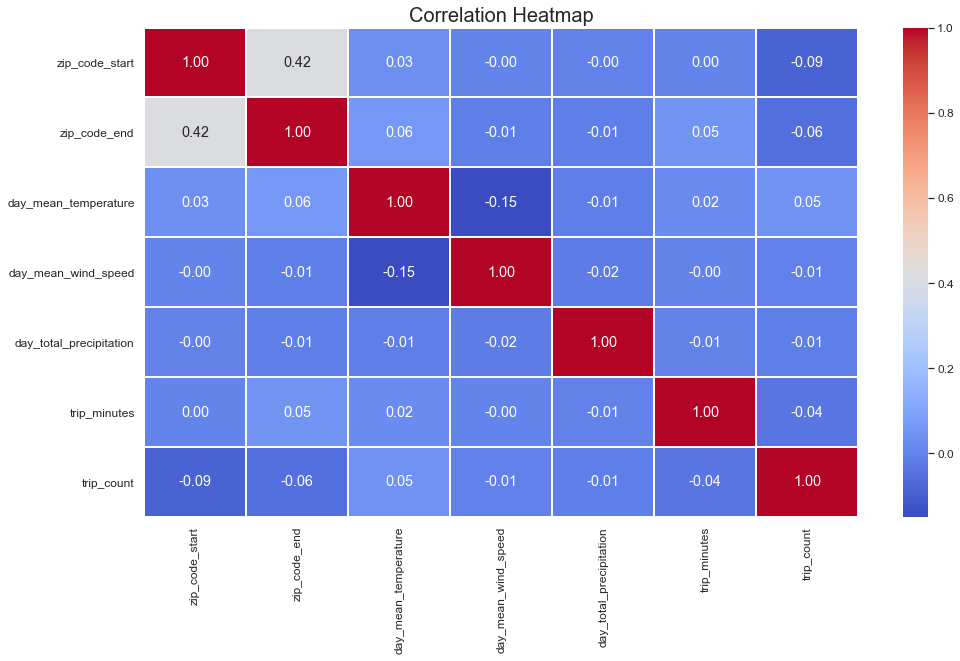

In [55]:
plt.figure(figsize=(16,9))
sns.heatmap(data=df.corr(), cmap="coolwarm", annot=True, fmt='.2f', linewidths=2)
plt.title("Correlation Heatmap", fontsize=20)
plt.show()

## Pairplots

### Seaborn Version

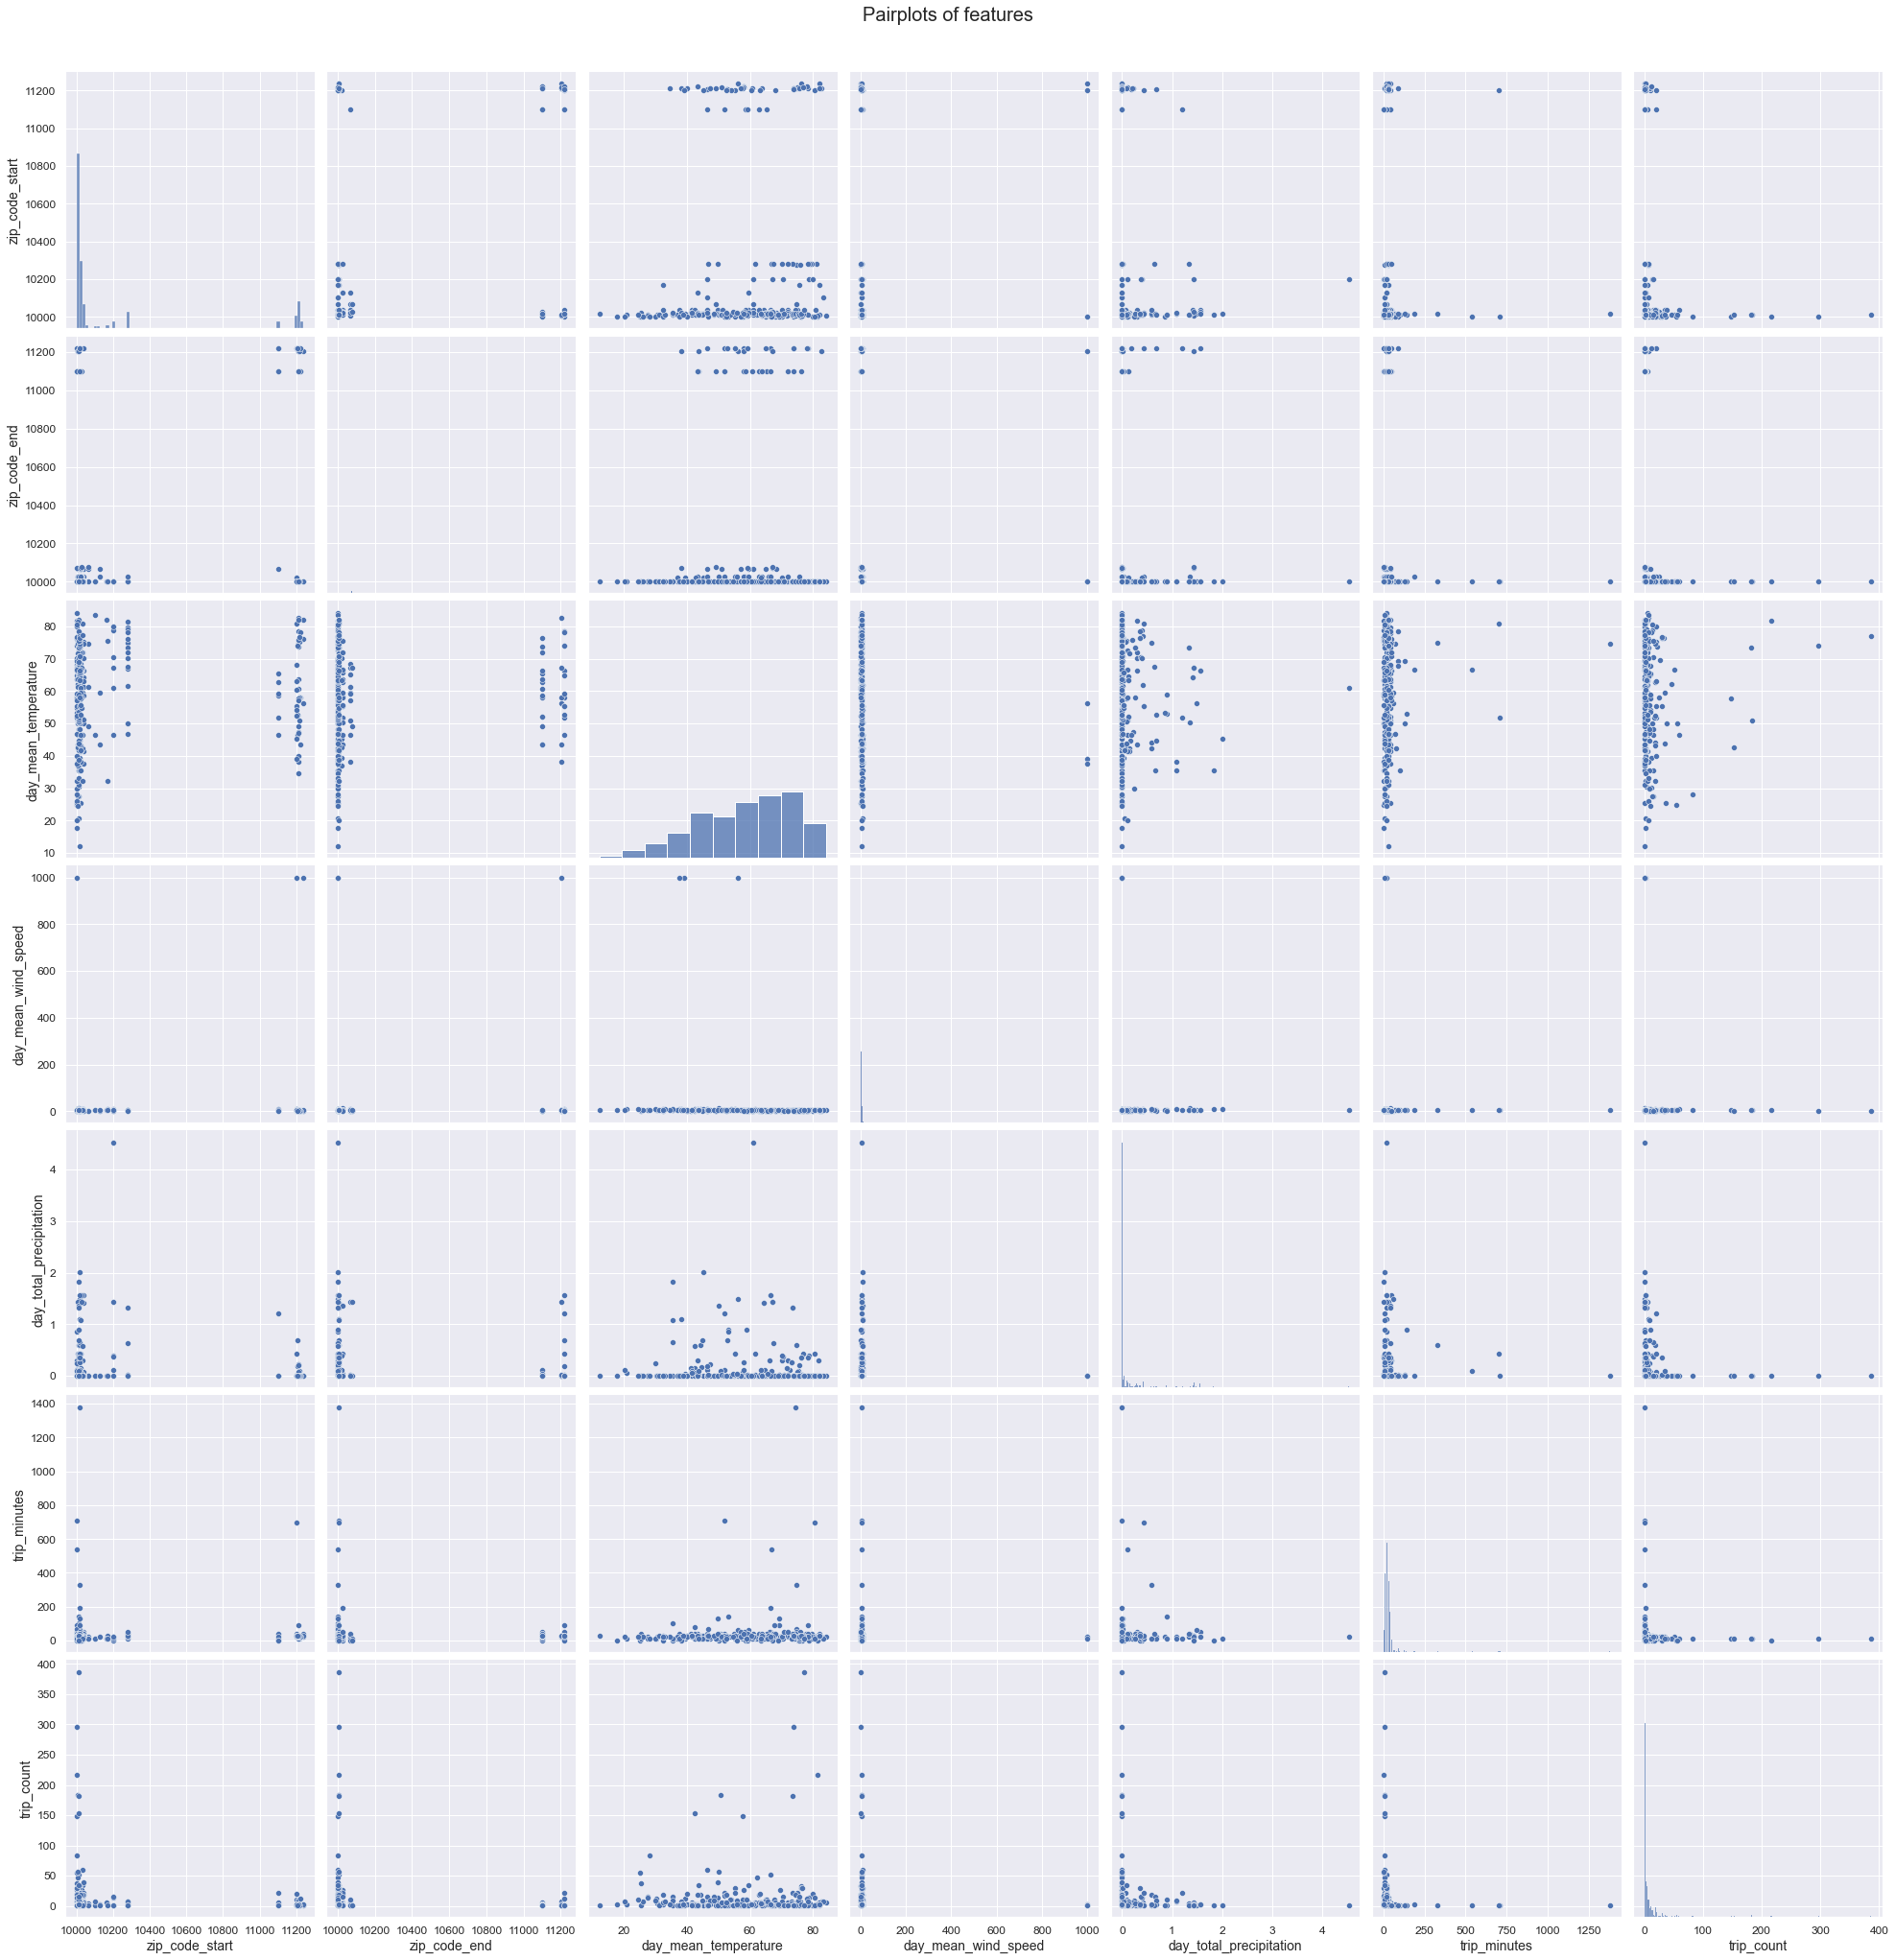

In [58]:
sns.pairplot(df.sample(300), height=4, aspect=1)
plt.suptitle('Pairplots of features', x=0.5, y=1.02, ha='center', fontsize=20)

plt.show()

#### Python code done by Dennis Lam